In [1]:
import uproot3 as uproot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

In [11]:
dump_file = "../dump_run8461.csv"
res_file = "../output/residuals/Run_1/run8461_cosmics_timing_residuals.csv"

In [12]:
dfres = pd.read_csv(res_file)
df = pd.read_csv(dump_file)

In [13]:
dfres.head()

,channel_id,x,y,z,entries,pecut,mean_residual_ns,std_residual_ns,emean_ns
0,0,-371.0701,-76.25,-872.9003,36.0,300.0,2.3738,3.0397,0.0844
1,1,-371.0700,29.35,-872.9000,10.0,300.0,1.5331,1.8887,0.1889
2,2,-371.0700,-129.05,-823.0199,17.0,300.0,0.7123,2.0676,0.1216
3,3,-371.0700,-23.45,-823.0197,31.0,300.0,1.0398,1.8845,0.0608
4,4,-371.0701,82.15,-823.0197,37.0,300.0,-0.9692,2.2915,0.0619


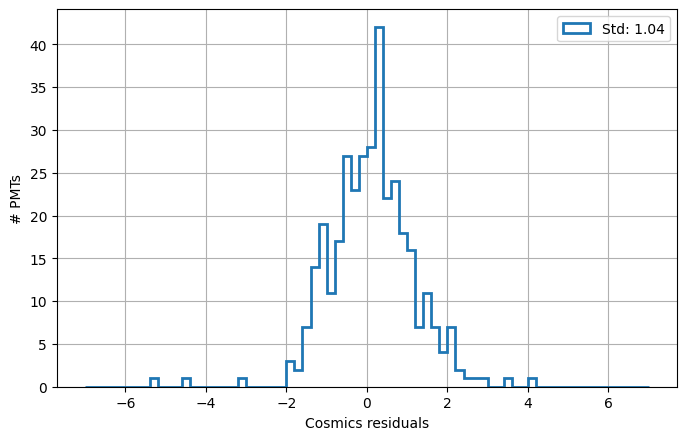

In [6]:
fig = plt.figure(figsize=(8,5),dpi=100)

mi,ma = -7.,7.
b = 0.2
n = int((ma-mi)/b)
plt.hist(dfres["mean_residual_ns"], bins=n, range=(mi,ma), lw=2, histtype="step",label="Std: {:.2f}".format(np.std(dfres["mean_residual_ns"].to_numpy())))

plt.grid()
plt.xlabel("Cosmics residuals")
plt.ylabel("# PMTs")
plt.legend()
plt.show()

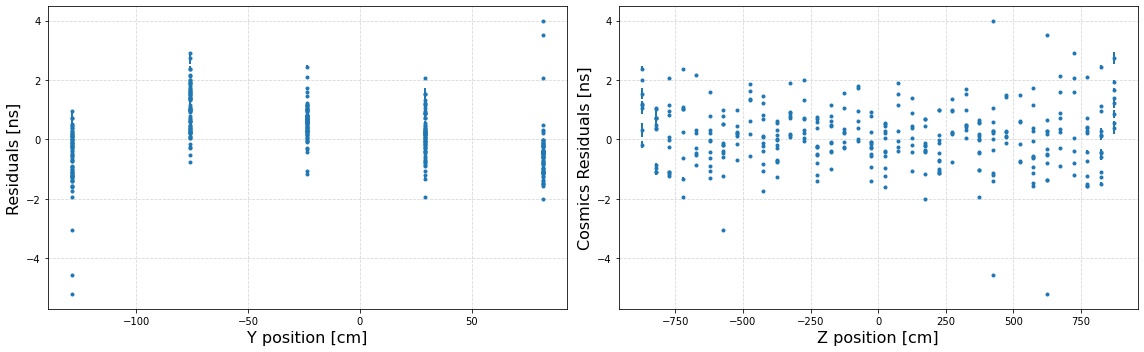

In [7]:
fig, ax = plt.subplots(1,2, figsize=(16, 5))
ax[0].errorbar( x=dfres.y, y=dfres.mean_residual_ns, yerr=dfres.emean_ns, marker='.', elinewidth=2.0, lw=0 )
ax[1].errorbar( x=dfres.z, y=dfres.mean_residual_ns, yerr=dfres.emean_ns, marker='.', elinewidth=2.0, lw=0 )
ax[0].set_ylabel("Residuals [ns]", fontsize=16)
ax[1].set_ylabel("Cosmics Residuals [ns]", fontsize=16)
ax[0].set_xlabel("Y position [cm]", fontsize=16)
ax[1].set_xlabel("Z position [cm]", fontsize=16)
plt.tight_layout()
ax[0].grid(alpha=0.5,linestyle="dashed")
ax[1].grid(alpha=0.5,linestyle="dashed")
plt.show()

In [8]:
#outliers
ch_high = dfres[dfres.mean_residual_ns>2].channel_id.to_numpy()
res_high = dfres[dfres.mean_residual_ns>2].mean_residual_ns.to_numpy()
ch_low = dfres[dfres.mean_residual_ns<-2].channel_id.to_numpy()
res_low = dfres[dfres.mean_residual_ns<-2].mean_residual_ns.to_numpy()

In [9]:
print(ch_high)
print(res_high)

[  0  10  30  80  81  83  86  88  98 180 187 337 347 348]
[2.3738 2.1609 2.0102 2.9113 2.0842 2.0908 2.4327 2.7453 2.3863 2.0148
 2.0521 4.0014 3.5113 2.1419]


In [10]:
print(ch_low)

[105 335 345]


In [11]:
df.head()

,entry,run,event,timestamp,flash_id,flash_time,flash_y,flash_width_y,flash_z,flash_width_z,...,trackEndY,trackEndZ,trackDirX,trackDirY,trackDirZ,trackLenght,channel_id,intercept,slope,residuals
0,17,8461,63617,1654814122,3,220.21385,-33.65027,72.169685,579.89233,119.119446,...,-178.392,496.005,-0.311158,-0.856341,-0.412141,391.605,65,220.214181,0.000018,-0.009967
1,17,8461,63617,1654814122,3,220.21385,-33.65027,72.169685,579.89233,119.119446,...,-178.392,496.005,-0.311158,-0.856341,-0.412141,391.605,68,220.214181,0.000018,0.001125
2,17,8461,63617,1654814122,3,220.21385,-33.65027,72.169685,579.89233,119.119446,...,-178.392,496.005,-0.311158,-0.856341,-0.412141,391.605,69,220.214181,0.000018,0.001226
3,17,8461,63617,1654814122,3,220.21385,-33.65027,72.169685,579.89233,119.119446,...,-178.392,496.005,-0.311158,-0.856341,-0.412141,391.605,70,220.214181,0.000018,0.002957
4,17,8461,63617,1654814122,3,220.21385,-33.65027,72.169685,579.89233,119.119446,...,-178.392,496.005,-0.311158,-0.856341,-0.412141,391.605,72,220.214181,0.000018,-0.000317


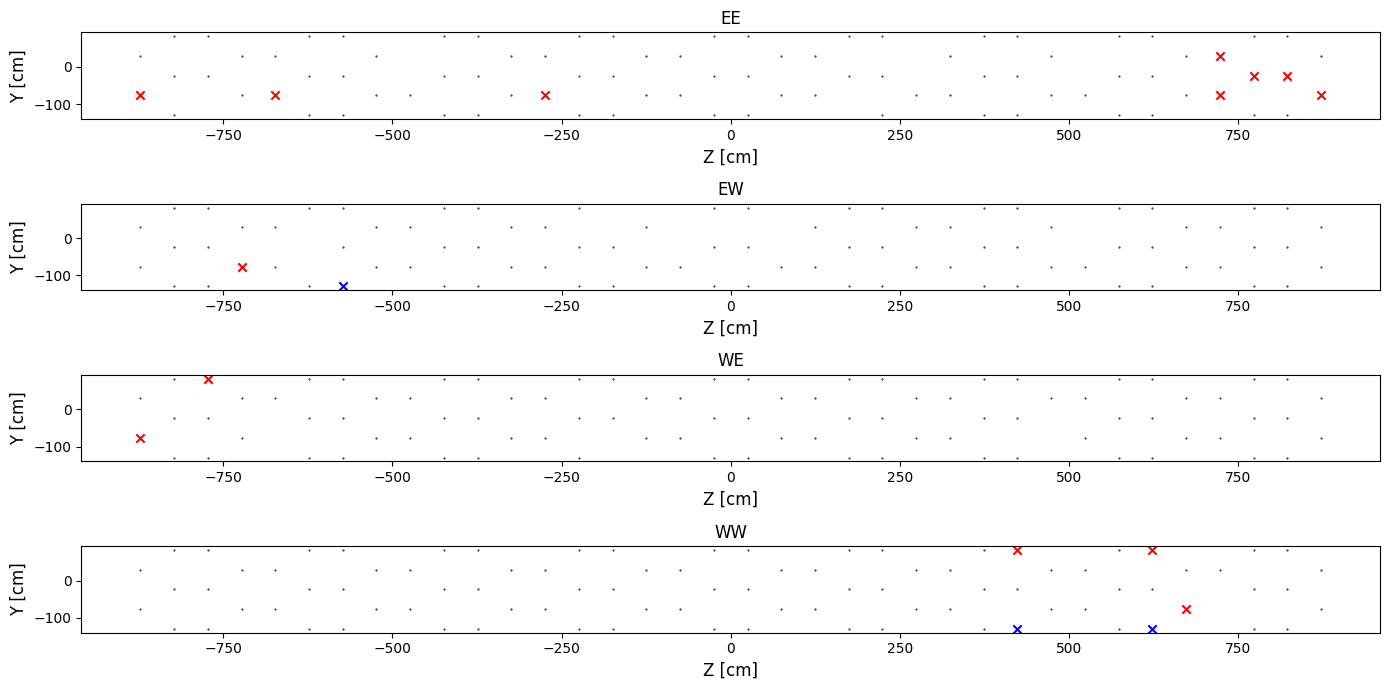

In [12]:
fig, ax = plt.subplots(4,figsize=(14,7),dpi=100)
names = [ "EE", "EW", "WE", "WW"]

for ch in range(0,360):

    _sel = dfres.channel_id == ch
    if ch<90:
        ax[0].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[0].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[0].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
            
    elif ch<180:
        ax[1].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[1].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[1].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
            
    elif ch<270:
        ax[2].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[2].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[2].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
    
    elif ch<360:
        ax[3].scatter(dfres[_sel].z, dfres[_sel].y, color="black", s=0.2)
        if ch in ch_high:
            ax[3].scatter(dfres[_sel].z, dfres[_sel].y, color="red", marker="x")
        elif ch in ch_low:
            ax[3].scatter(dfres[_sel].z, dfres[_sel].y, color="blue", marker="x")
    
for i in range(0,4): 
    ax[i].set_title(names[i])
    ax[i].set_xlabel("Z [cm]",fontsize=12)
    ax[i].set_ylabel("Y [cm]", fontsize=12) 

fig.tight_layout()
plt.show()

## LOOKING AT A SINGLE CHANNEL

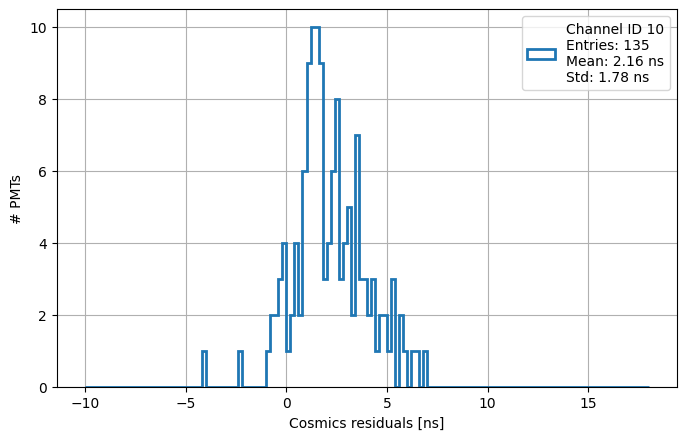

In [13]:
fig = plt.figure(figsize=(8,5),dpi=100)

channel = 10
mi,ma = -10.,18.
b = 0.2
n = int((ma-mi)/b)

residuals = df[df.channel_id==channel].residuals.to_numpy()

lab = "Channel ID "+str(channel)+"\n"
lab += "Entries: {}\n".format(len(residuals))
lab += "Mean: {:.2f} ns\n".format(np.mean(residuals*1e3))
lab += "Std: {:.2f} ns".format(np.std(residuals*1e3))

plt.hist(df[df.channel_id==channel].residuals*1e3, bins=n, range=(mi,ma), lw=2, histtype="step", label=lab)

plt.grid()
plt.xlabel("Cosmics residuals [ns]")
plt.ylabel("# PMTs")
plt.savefig("ch{}_residuals.png".format(channel))
plt.legend()
plt.show()

In [14]:
# list of unique events/flashes with ch 28
df[df.channel_id==channel][["event","flash_id","intercept","slope"]].head(264)

,event,flash_id,intercept,slope
206,66773,1,6.149213,-0.000046
418,18943,6,141.039765,-0.000038
809,62031,3,362.952910,-0.000031
1401,46768,1,-0.604086,-0.000031
1431,34974,1,179.627860,-0.000028
...,...,...,...,...
24555,23595,3,-19.310635,-0.000047
24599,23871,2,36.029348,-0.000028
24667,24339,3,-0.608061,-0.000041
24725,24927,4,-143.002245,-0.000042


In [15]:
dfres[dfres.channel_id==channel][["channel_id","x","y","z"]].head()

,channel_id,x,y,z
9,10,-371.0702,-76.25,-673.3805


In [5]:
import sqlite3
def readSqlitedb(database="/cvmfs/icarus.opensciencegrid.org/products/icarus/icarus_data/v09_78_00/icarus_data/database/ChannelMapICARUS_20230829.db", table="pmt_placements"):

    # Read sqlite query results into a pandas DataFrame
    con = sqlite3.connect(database)
    df = pd.read_sql_query("SELECT * from {}".format(table), con)
    con.close()
    return df

def getChannelsFromBoard(board):
    geo = readSqlitedb()
    channels = geo[geo.digitizer_label==board].channel_id.to_numpy()
    return channels

def getBoardFromChannel(channel):
    geo = readSqlitedb()
    board = geo[geo.channel_id==channel].digitizer_label.values[0]
    return board

def getDigitizerChannelFromChannel(channel):
    geo = readSqlitedb()
    dig_ch = geo[geo.channel_id==channel].digitizer_ch_number.values[0]
    return dig_ch

def getChannelFromPMTid(pmt):
    geo = readSqlitedb()
    channel = geo[geo.pmt_id==pmt].channel_id.values[0]
    return channel

def getSignalCableFromChannel(channel):
    geo = readSqlitedb()
    cable = geo[geo.channel_id==channel].signal_cable_label.values[0]
    return cable

In [17]:
boards = []
for ch in ch_high:
    boards.append( getBoardFromChannel(ch))

In [18]:
print ( boards )

['EE-BOT-C', 'EE-BOT-B', 'EE-BOT-A', 'EE-TOP-A', 'EE-TOP-A', 'EE-TOP-A', 'EE-TOP-A', 'EE-TOP-A', 'EW-BOT-C', 'WE-BOT-C', 'WE-BOT-C', 'WW-TOP-B', 'WW-TOP-B', 'WW-TOP-B']


### INVESTIGATING SINGLE FLASH

In [19]:
LIGHTINFO = "../inputs/run8461_tracks_BNBMAJORITY_files.txt"
FILENAMES = [ line.strip() for line in open(LIGHTINFO, "r") ]
maxim = 4

In [20]:
def loadSingleFile( tfile, treename, flatenndf=False ):
    ttree = uproot.open(tfile)
    data = ttree[treename].arrays(outputtype=pd.DataFrame,flatten=flatenndf)
    return data

file = FILENAMES[0]

flashes = loadSingleFile( file, "simpleLightAna/opflashCryoE_flashtree")
flashes.drop(columns=["multiplicity","multiplicity_right","multiplicity_left","sum_pe","sum_pe_right","sum_pe_left"],inplace=True)
flashes["channel_id"] = flashes.pmt_y.apply( lambda x : np.arange(len(x)) )
flashes = flashes.explode(["time_pmt", "pmt_x", "pmt_y", "pe_pmt", "pmt_z", "channel_id","amplitude_pmt"])

hits = loadSingleFile( file, "simpleLightAna/opflashCryoE_ophittree")

In [21]:
EVENT=66773
FLASH=1

In [22]:
flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>0)].head()

,run,event,timestamp,flash_id,flash_time,flash_y,flash_width_y,flash_z,flash_width_z,pmt_x,pmt_y,pmt_z,time_pmt,pe_pmt,amplitude_pmt,channel_id
entry,,,,,,,,,,,,,,,,
337,8461,66773,1654818985,1,6.148676,-8.988593,76.167397,-533.422913,138.544708,-371.070007,-76.25,-872.900024,6.168874,20.426951,147.0,0
337,8461,66773,1654818985,1,6.148676,-8.988593,76.167397,-533.422913,138.544708,-371.070007,29.35,-872.900024,6.173791,17.761801,189.2,1
337,8461,66773,1654818985,1,6.148676,-8.988593,76.167397,-533.422913,138.544708,-371.070007,-129.050003,-823.02002,6.176938,13.076894,138.8,2
337,8461,66773,1654818985,1,6.148676,-8.988593,76.167397,-533.422913,138.544708,-371.070007,-23.450001,-823.02002,6.168128,27.867502,183.4,3
337,8461,66773,1654818985,1,6.148676,-8.988593,76.167397,-533.422913,138.544708,-371.070007,82.150002,-823.02002,6.177361,8.632044,80.2,4


In [23]:
hits[(hits.event==EVENT)&(hits.flash_id==FLASH)].head()

,run,event,timestamp,flash_id,channel_id,integral,amplitude,start_time,abs_start_time,pe,width,fast_to_total
entry,,,,,,,,,,,,
78770,8461,66773,1654818985,1,128,512.000000,63.000000,7.123170,1507.123169,1.608768,0.074,0.0
78771,8461,66773,1654818985,1,93,535.200012,94.199997,7.122803,1507.122803,1.681665,0.056,0.0
78772,8461,66773,1654818985,1,125,318.799988,42.799999,7.103151,1507.103149,1.001709,0.054,0.0
78773,8461,66773,1654818985,1,89,1346.000000,132.000000,7.101043,1507.101074,4.229300,0.056,0.0
78774,8461,66773,1654818985,1,122,325.200012,31.799999,7.089662,1507.089722,1.021819,0.056,0.0


In [24]:
# QUESTION: does it contain only the first hit of each PMT or the full thing:
all_chs = hits[(hits.event==EVENT)&(hits.flash_id==FLASH)].channel_id.to_numpy()
all_chs_unique = np.unique(hits[(hits.event==EVENT)&(hits.flash_id==FLASH)].channel_id.to_numpy())

print(len(all_chs), len(all_chs_unique))
#apparently it's not just the first one then since the two numbers are different

239 89


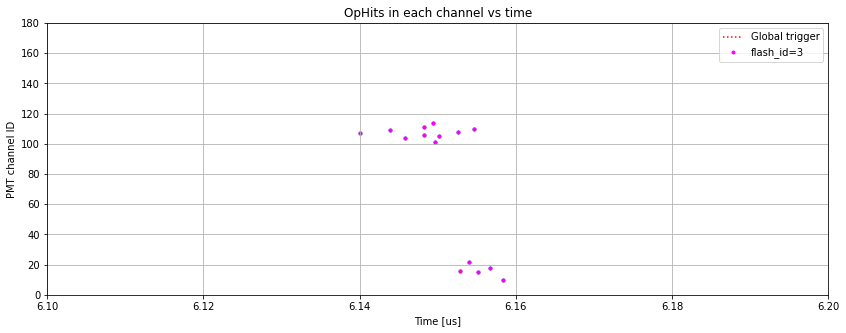

In [25]:
PE_CUT = 300

chs = hits[(hits.event==EVENT)&(hits.pe>PE_CUT)].channel_id.to_numpy()
starts = hits[(hits.event==EVENT)&(hits.pe>PE_CUT)].start_time.to_numpy()

fchs = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].channel_id.to_numpy()
fstarts = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].time_pmt.to_numpy()
fys = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].pmt_y.to_numpy()
fpes = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].pe_pmt.to_numpy()
famps = flashes[(flashes.event==EVENT)&(flashes.flash_id==FLASH)&(flashes.pe_pmt>PE_CUT)].amplitude_pmt.to_numpy()

#print(ch, tt)
fig = plt.figure(figsize=(14, 5))
plt.scatter(starts, chs, marker=".")
plt.scatter(fstarts, fchs, marker=".", color="magenta", label="flash_id=3")

plt.axvline(x=0,color="red",linestyle="dotted",label="Global trigger")

plt.xlim((6.1,6.2))
plt.ylim((0,180)) #EAST ONLY

plt.grid()
plt.title("OpHits in each channel vs time")
plt.xlabel("Time [us]")
plt.ylabel("PMT channel ID")
plt.legend()

plt.show()

In [26]:
bchs, bstarts, bys, bamps = [], [], [], []
for i,ch in enumerate(fchs):
    if fstarts[i] > 6.15:
        print(ch, fstarts[i], fys[i], famps[i], getBoardFromChannel(ch))
        bchs.append(ch)
        bstarts.append(fstarts[i])
        bys.append(fys[i])
        bamps.append(famps[i])

10 6.158380229999996 -76.25 627.7999999999993 EE-BOT-B
15 6.155093059999996 -129.05 449.39999999999964 EE-BOT-C
16 6.152798430000043 -23.45 524.0 EE-BOT-C
18 6.156699329999997 -76.25 234.39999999999964 EE-BOT-C
22 6.153997830000043 -129.05 554.7999999999993 EE-BOT-B
105 6.150184339999769 -129.05 249.0 EW-BOT-C
108 6.152641919999816 -76.25 788.0 EW-BOT-C
110 6.154659229999949 -76.25 130.60000000000036 EW-BOT-B


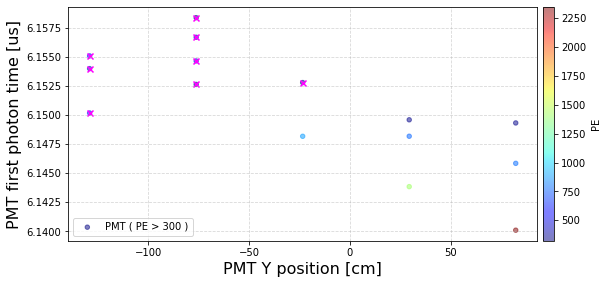

In [27]:
fig, ax = plt.subplots( 1,1, figsize=(10, 4.3) )

out = ax.scatter( fys, fstarts, c=fpes, s=20, label='PMT ( PE > {} )'.format(PE_CUT), cmap='jet', alpha=0.5 )
fig.colorbar( out, ax=ax, label="PE", pad=0.01 )

#res = stats.linregress( evtmdf.pmt_y, evtmdf.weight_mean_time ) 
#ax.plot( np.linspace(-150, 100),  np.linspace(-150, 100)*res.slope+res.intercept, lw=2.0, color='red', label='Time fit' )

ax.scatter(bys,bstarts,color="magenta",marker="x")

ax.set_ylabel("PMT first photon time [us]", fontsize=16)
ax.set_xlabel("PMT Y position [cm]", fontsize=16)
ax.grid(alpha=0.5, linestyle="dashed")
ax.legend()
ax.legend(loc='lower left')

#### GO DEEPER INTO WAVEFORMS

In [28]:
wffile = "/icarus/data/users/mvicenzi/pmt-info/runs/8461/wf_output_8461_only1.root"
laser8046 = "../inputs/laser_time_corrections_20220408.csv"
waveforms = loadSingleFile( wffile, "waveforms/wftree")
dflaser = pd.read_csv(laser8046,sep=",")

In [29]:
waveforms[(waveforms.event==66773)&(waveforms.channel_id==10)].head(20)

,run,event,timestamp,channel_id,tstart,nsize,wf
entry,,,,,,,
116670,8461,66773,1654818985,10,509.688,5000,"[14938, 14937, 14933, 14927, 14936, 14936, 149..."
116671,8461,66773,1654818985,10,1492.392,12960,"[14935, 14933, 14932, 14934, 14936, 14936, 149..."
116672,8461,66773,1654818985,10,1843.592,5000,"[14930, 14932, 14937, 14932, 14930, 14932, 149..."


In [30]:
def plot_wfs(data, laser, ev, flash_time, channel,chtime):
    
    t0 = 0
    tend = 0
    c = -laser[laser.channel_id==channel].t_signal.values[0]/1000
    
    for t in waveforms[(waveforms.event==ev)&(waveforms.channel_id==channel)].tstart.to_numpy():
        nsize = waveforms[(waveforms.event==ev)&(waveforms.channel_id==channel)&(waveforms.tstart==t)].nsize.values[0]
        tend = t + nsize*0.002 + c
        if t+c < flash_time and tend > flash_time:
            t0 = t+c
            break

    wf = waveforms[(waveforms.event==ev)&(waveforms.channel_id==channel)&(waveforms.tstart==t0-c)].wf.values[0]
    tt = np.arange(t0, tend-0.002, 0.002)
    
    ipeak = np.argmin(wf)
    tpeak = tt[ipeak]
    
    fig = plt.figure(figsize=(14, 5))
    
    plt.plot( tt*1000, wf, label="PMT ch "+str(channel))
    plt.axvline(x=(chtime+1500)*1000, color="red", label="First hit time for {}".format(CHANNEL))
    plt.axvline(x=tpeak*1000, color="red", label="Peak for {}".format(CHANNEL), linestyle="dotted")
    plt.axvspan(xmin=flash_time*1000, xmax=(flash_time+1)*1000, color="green", alpha=0.1, label="Flash excl. zone")

    plt.ylabel("Amplitude [ADC #]")
    plt.xlabel("Time [ns]")
    plt.xlim((1506.13*1000,1506.3*1000))
    plt.legend()
    plt.grid()
    plt.show()
    
    return tpeak

In [31]:
print(fchs,fstarts)

[10 15 16 18 22 101 104 105 106 107 108 109 110 111 114] [6.158380229999996 6.155093059999996 6.152798430000043 6.156699329999997
 6.153997830000043 6.149595999999864 6.145852949999778 6.150184339999769
 6.148179139999958 6.14010395999992 6.152641919999816 6.143848199999826
 6.154659229999949 6.148183819999778 6.149326109999911]


Flash w.r.t. trigger: 1506.148676 us


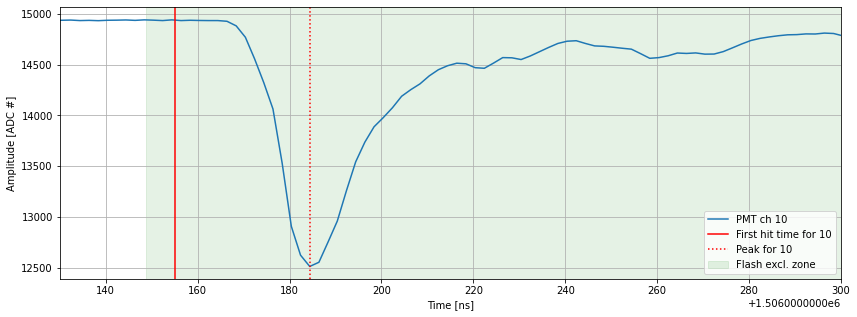

1506.184380230668

In [32]:
CHANNEL = 10
FLASHT = 6.148676+1500
print("Flash w.r.t. trigger: {} us".format(FLASHT))

plot_wfs(waveforms, dflaser, EVENT, FLASHT, CHANNEL, bstarts[1])

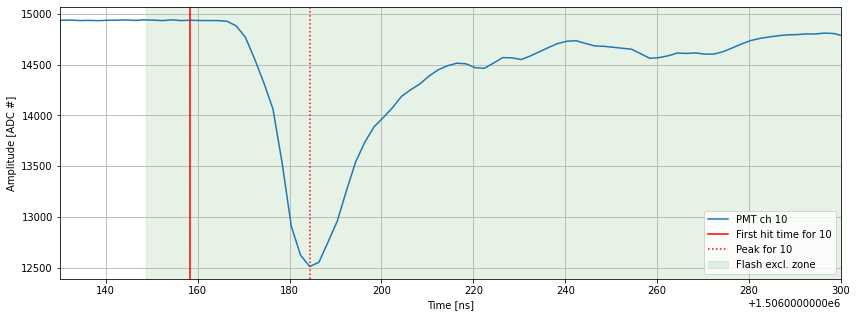

1506.15838023 1506.184380230668 26.00000066809116


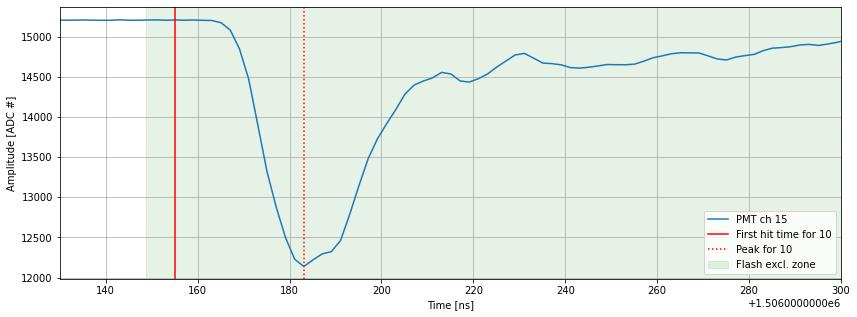

1506.15509306 1506.1830930686692 28.000008669323506


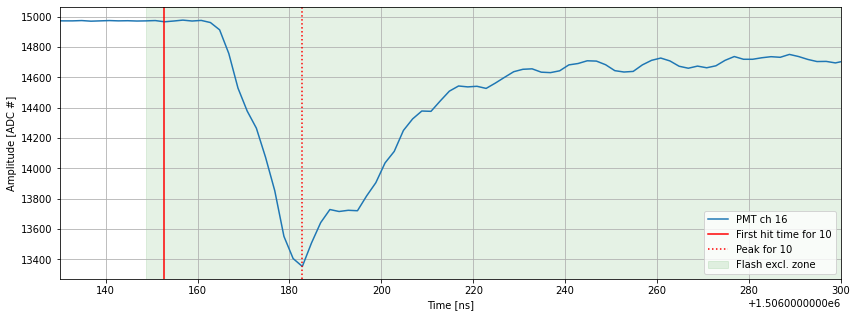

1506.15279843 1506.1827984316692 30.000001669122867


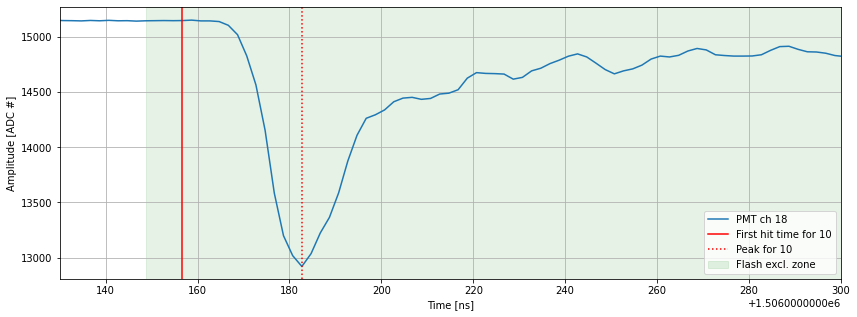

1506.15669933 1506.1826993286693 25.99999866924918


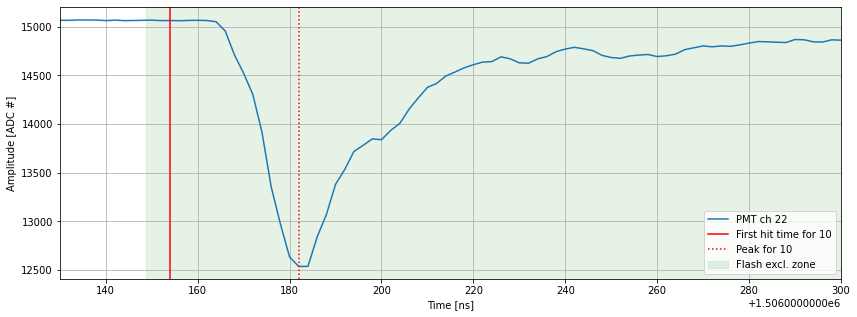

1506.15399783 1506.1819978366682 28.00000666820779


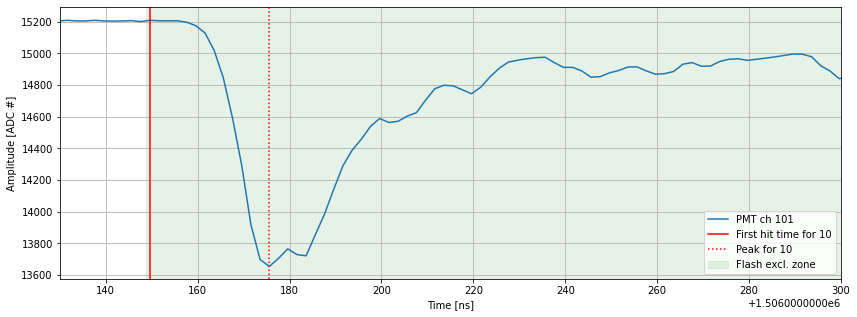

1506.149596 1506.175595987668 25.999987668001268


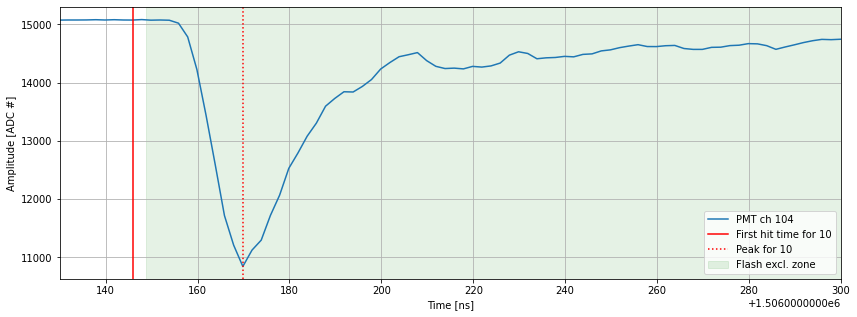

1506.1458529499998 1506.1698529526682 24.000002668344678


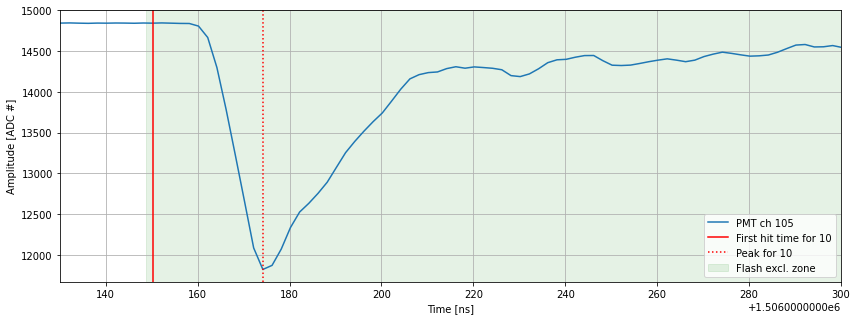

1506.1501843399997 1506.1741843456691 24.00000566944982


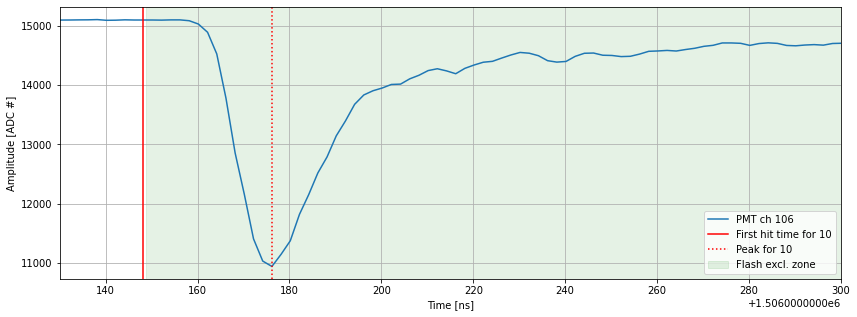

1506.14817914 1506.1761791360311 27.999996031212504


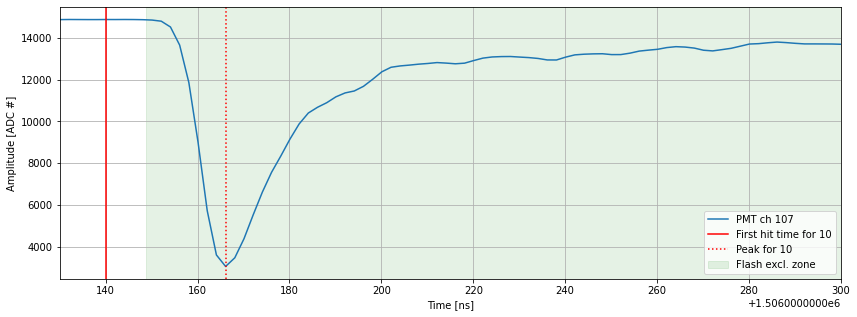

1506.14010396 1506.1661039565975 25.99999659742025


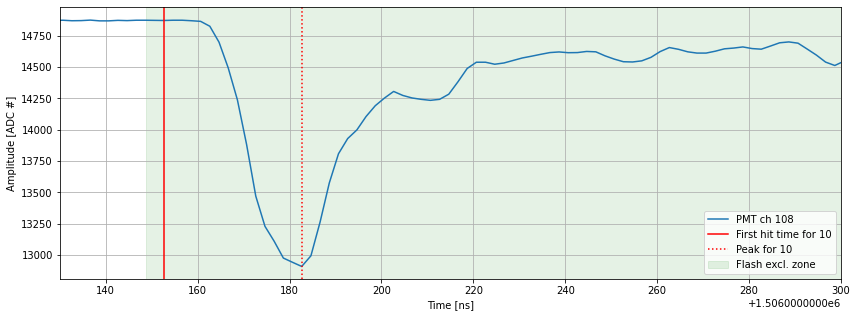

1506.1526419199997 1506.1826419186689 29.999998669154593


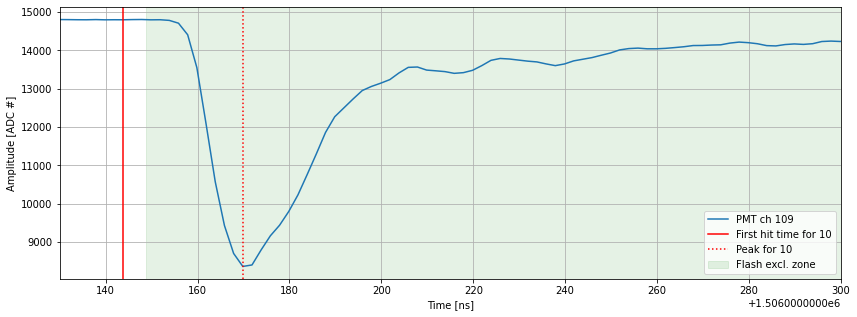

1506.1438481999999 1506.1698482106692 26.00001066934965


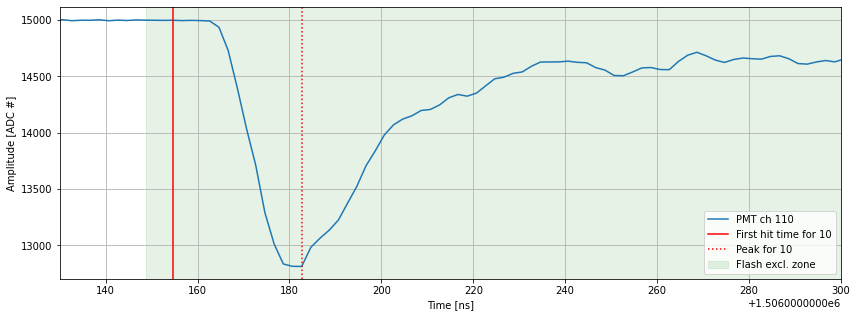

1506.1546592299999 1506.1826592216678 27.999991667911672


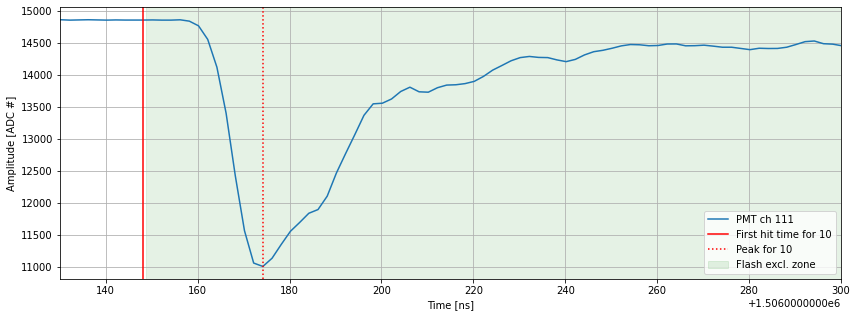

1506.1481838199998 1506.1741838189648 25.999998965062332


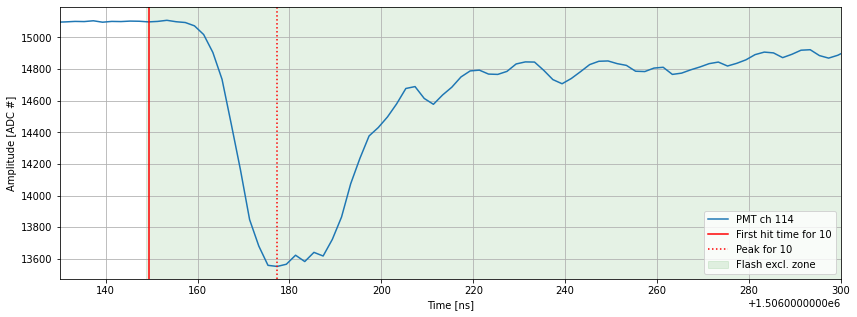

1506.14932611 1506.177326113668 28.00000366801214


In [33]:
ftpeaks = []
ftdiff= []
for i,ch in enumerate(fchs):
    tpeak = plot_wfs(waveforms, dflaser, EVENT, FLASHT, ch, fstarts[i])
    ftpeaks.append(tpeak)
    ftdiff.append(tpeak-fstarts[i]-1500)
    print(fstarts[i]+1500,tpeak,(tpeak-fstarts[i]-1500)*1000)


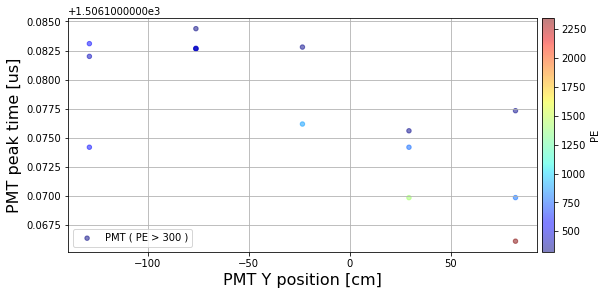

In [34]:
fig, ax = plt.subplots( 1,1, figsize=(10, 4.3) )

out = ax.scatter( fys, ftpeaks, c=fpes, s=20, label='PMT ( PE > {} )'.format(PE_CUT), cmap='jet', alpha=0.5 )
fig.colorbar( out, ax=ax, label="PE", pad=0.01 )

#res = stats.linregress( evtmdf.pmt_y, evtmdf.weight_mean_time ) 
#ax.plot( np.linspace(-150, 100),  np.linspace(-150, 100)*res.slope+res.intercept, lw=2.0, color='red', label='Time fit' )

#ax.scatter(bys,bstarts,color="magenta",marker="x")

ax.set_ylabel("PMT peak time [us]", fontsize=16)
ax.set_xlabel("PMT Y position [cm]", fontsize=16)
ax.grid()
ax.legend()
ax.legend(loc='lower left')

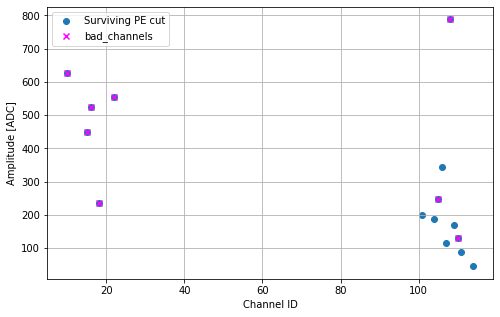

10 EE-BOT-B
15 EE-BOT-C
16 EE-BOT-C
18 EE-BOT-C
22 EE-BOT-B
101 EW-BOT-B
104 EW-BOT-B
105 EW-BOT-C
106 EW-BOT-C
107 EW-BOT-C
108 EW-BOT-C
109 EW-BOT-C
110 EW-BOT-B
111 EW-BOT-B
114 EW-BOT-B


In [35]:
fig = plt.figure(figsize=(8,5))
plt.scatter(fchs,famps,label="Surviving PE cut")
plt.scatter(bchs,bamps,color="magenta",marker="x",label="bad_channels")
plt.grid()
plt.legend()
plt.xlabel("Channel ID")
plt.ylabel("Amplitude [ADC]")
plt.show()
for ch in fchs:
    print(ch,getBoardFromChannel(ch))

## CHECK DIGITIZED TRIGGER SIGNAL

In [36]:
trigfile = "/icarus/data/users/mvicenzi/pmt-info/runs/8461/wf_output_8461_only1_globtrg.root"
triggers = loadSingleFile( trigfile, "waveforms/wftree")

In [37]:
triggers[(triggers.event==EVENT)]

,run,event,timestamp,channel_id,tstart,nsize,wf
entry,,,,,,,
368,8461,66773,1654818985,24577,1492.176,12960,"[15155, 15145, 15141, 15147, 15142, 15156, 151..."
369,8461,66773,1654818985,24593,1492.176,12960,"[14953, 14961, 14962, 14955, 14974, 14959, 149..."
370,8461,66773,1654818985,24609,1492.176,12960,"[15185, 15173, 15172, 15162, 15184, 15187, 151..."
371,8461,66773,1654818985,24625,1492.176,12960,"[15094, 15063, 15065, 15076, 15049, 15092, 150..."
372,8461,66773,1654818985,24641,1492.192,12968,"[14956, 14949, 14961, 14959, 14949, 14960, 149..."
373,8461,66773,1654818985,24657,1492.184,12968,"[15121, 15113, 15146, 15113, 15122, 15142, 150..."
374,8461,66773,1654818985,24673,1492.192,12968,"[15137, 15119, 15130, 15130, 15143, 15138, 151..."
375,8461,66773,1654818985,24689,1492.192,12960,"[15130, 15147, 15130, 15139, 15169, 15131, 151..."


In [4]:
trig_channels = {
    "WW-TOP-A": 0x6071,
    "WW-BOT-A": 0x6061,
    "WE-TOP-A": 0x6051,
    "WE-BOT-A": 0x6041,
    "EW-TOP-A": 0x6031,
    "EW-BOT-A": 0x6021,
    "EE-TOP-A": 0x6011,
    "EE-BOT-A": 0x6001,
}
trig_channels_ = {
    0x6071:"WW-TOP-A",
    0x6061:"WW-BOT-A",
    0x6051:"WE-TOP-A",
    0x6041:"WE-BOT-A",
    0x6031:"EW-TOP-A",
    0x6021:"EW-BOT-A",
    0x6011:"EE-TOP-A",
    0x6001:"EE-BOT-A",
}

In [40]:
file_corrs = "/icarus/app/users/mvicenzi/OpHit/Trees-data_dl6_fstrmBNBMAJORITY_run8461_21_20220609T223034_20230913T185322-stage0-c3173f2a-6b46-4ea0-91ba-6c5071e66144_20231011T204637-opwffilter.root"
ttree = uproot.open(file_corrs)
df_wf_corrs = ttree["checker/trigtree"].arrays(outputtype=pd.DataFrame, flatten=False)

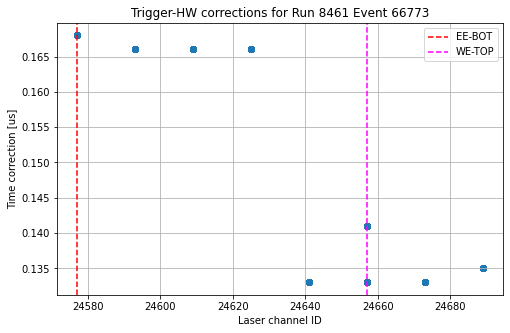

In [48]:
fig = plt.figure(figsize=(8,5))
plt.scatter(df_wf_corrs[df_wf_corrs.event==EVENT].trg_channel,df_wf_corrs[df_wf_corrs.event==EVENT].wf_corr)
plt.title("Trigger-HW corrections for Run {} Event {}".format(8461,EVENT))
plt.xlabel("Laser channel ID")
plt.ylabel("Time correction [us]")
plt.axvline(x=trig_channels["EE-BOT-A"], color="red", linestyle="dashed", label="EE-BOT")
plt.axvline(x=trig_channels["WE-TOP-A"], color="magenta", linestyle="dashed", label="WE-TOP")
plt.legend()
plt.grid()
plt.show()

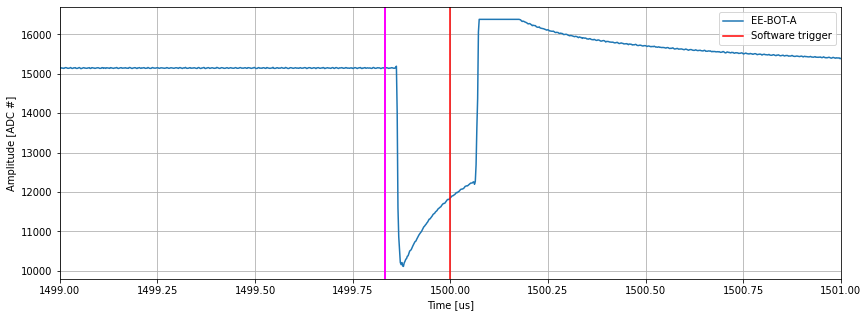

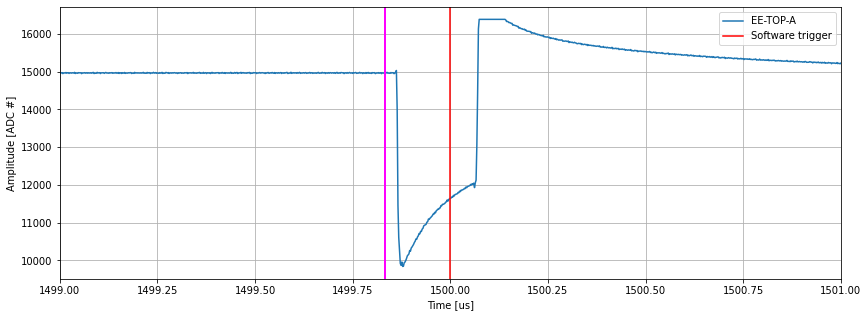

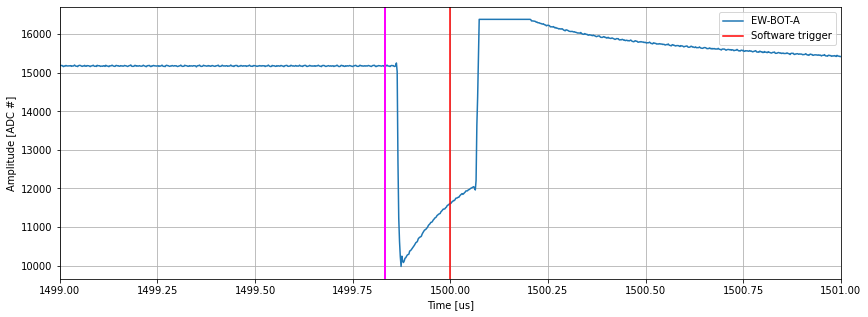

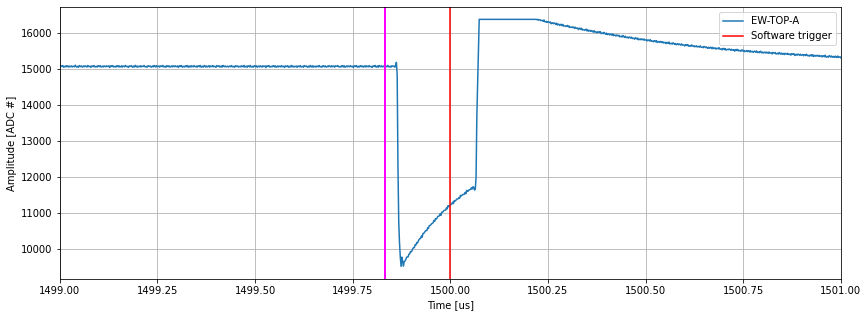

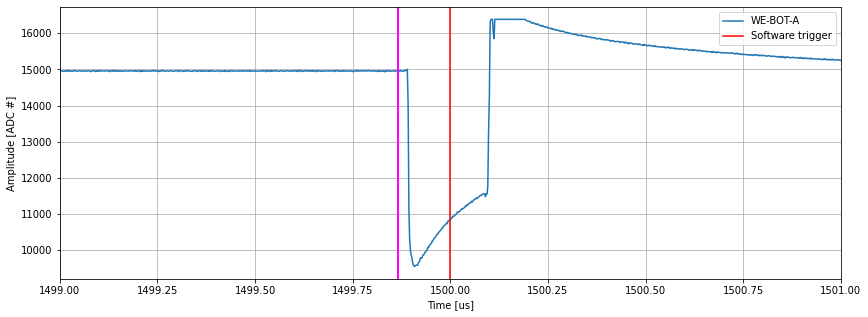

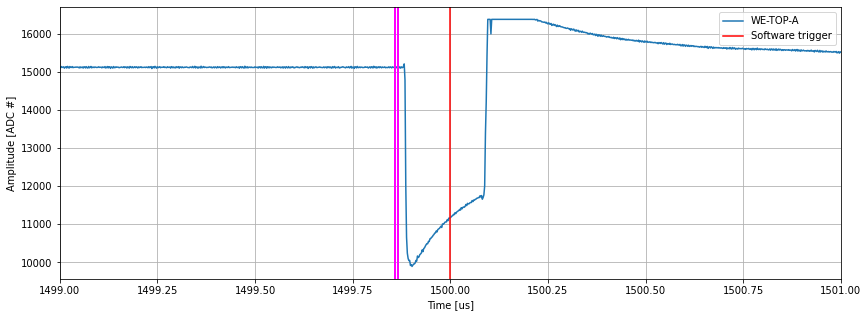

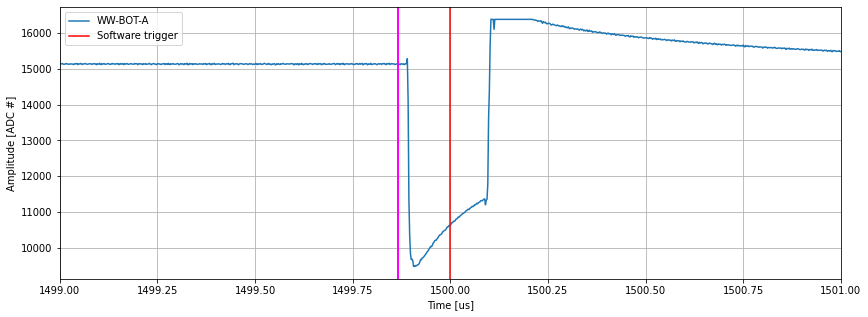

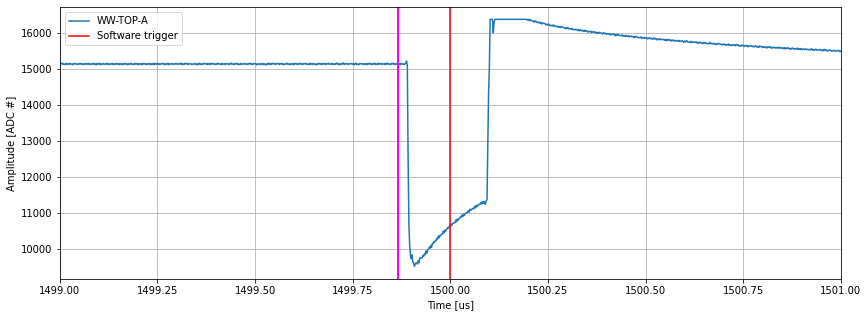

In [49]:
for ch in triggers[triggers.event==EVENT].channel_id.to_numpy():
    tstart = triggers[(triggers.event==EVENT) & (triggers.channel_id==ch)].tstart.values[0]
    nsize = triggers[(triggers.event==EVENT) & (triggers.channel_id==ch)].nsize.values[0]
    tend = tstart + 0.002*nsize
    
    wf = triggers[(triggers.event==EVENT) & (triggers.channel_id==ch)].wf.values[0]
    tt = np.arange(tstart, tend-0.002, 0.002)
    
    if len(wf) > len(tt):
        tt = np.arange(tstart, tend, 0.002)
    
    fig = plt.figure(figsize=(14, 5))
    
    plt.plot( tt, wf, label=trig_channels_[ch])
    plt.axvline(x=1500, color="red", label="Software trigger")
    
    for corr in df_wf_corrs[(df_wf_corrs.event==EVENT)&(df_wf_corrs.trg_channel==ch)].wf_corr.to_numpy():
        plt.axvline(x=1500-corr, color="magenta")

    plt.ylabel("Amplitude [ADC #]")
    plt.xlabel("Time [us]")
    plt.xlim((1499,1501))
    plt.legend()
    plt.grid()
    plt.show()

In [47]:
df_wf_corrs[(df_wf_corrs.event==EVENT)&(df_wf_corrs.trg_channel==0x6051)].head(360)

,run,event,timestamp,trg_channel,wf_corr
entry,,,,,
16780,8461,66773,1654818985,24657.0,0.133
16781,8461,66773,1654818985,24657.0,0.133
16782,8461,66773,1654818985,24657.0,0.133
16783,8461,66773,1654818985,24657.0,0.133
16784,8461,66773,1654818985,24657.0,0.133
16790,8461,66773,1654818985,24657.0,0.133
16791,8461,66773,1654818985,24657.0,0.133
16792,8461,66773,1654818985,24657.0,0.133
16793,8461,66773,1654818985,24657.0,0.133


#### INTERMEZZO

In [53]:
def plot_trig_corr(df_corr, ev):
    fig = plt.figure(figsize=(8,5))
    plt.scatter(df_corr[df_corr.event==ev].trg_channel,df_corr[df_corr.event==ev].wf_corr)
    plt.title("Trigger-HW corrections for Run {} Event {}".format(8461,ev))
    plt.xlabel("Laser channel ID")
    plt.ylabel("Time correction [us]")
    plt.axvline(x=trig_channels["EE-BOT-A"], color="red", linestyle="dashed", label="EE-BOT")
    plt.axvline(x=trig_channels["WE-TOP-A"], color="magenta", linestyle="dashed", label="WE-TOP")
    plt.legend()
    plt.grid()
    plt.show()

In [56]:
events = np.unique(df_wf_corrs.event.to_numpy())

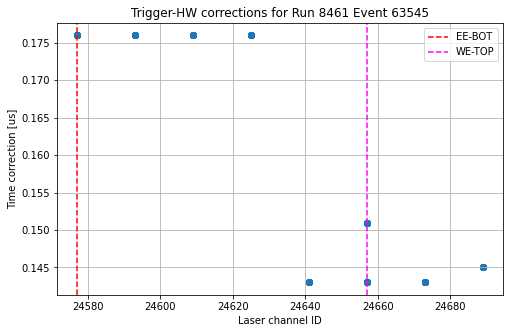

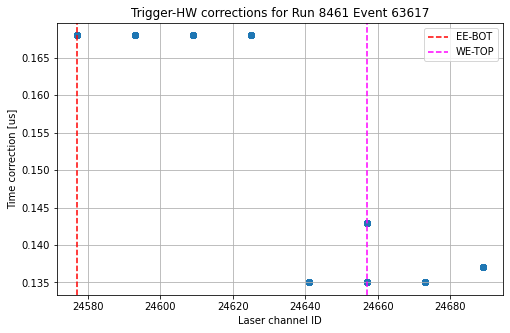

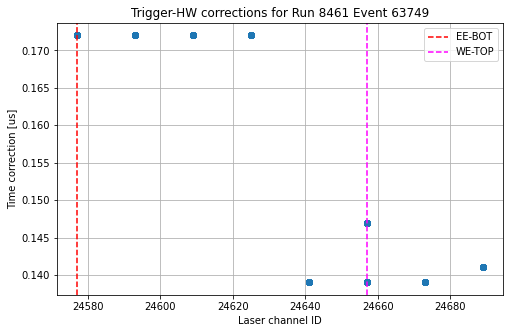

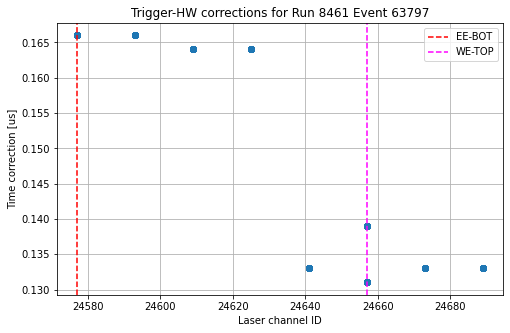

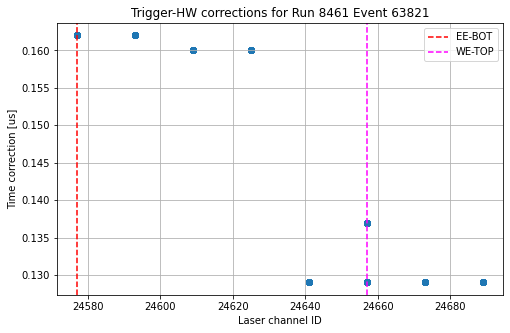

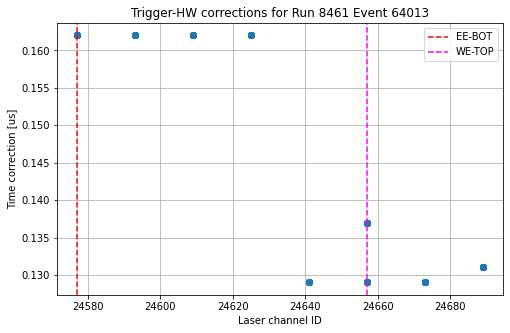

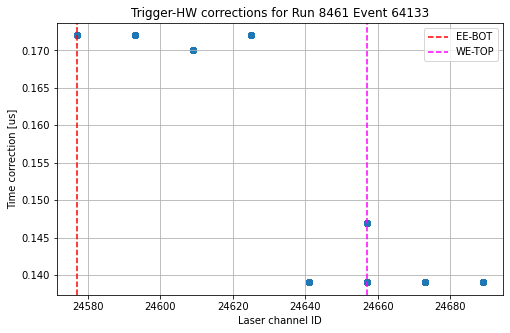

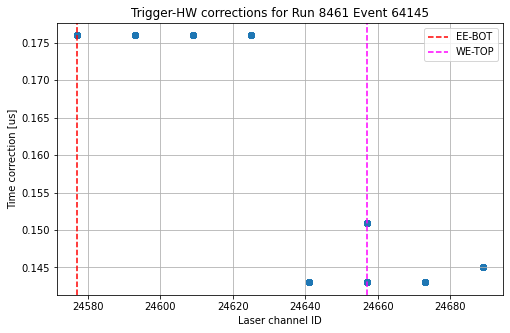

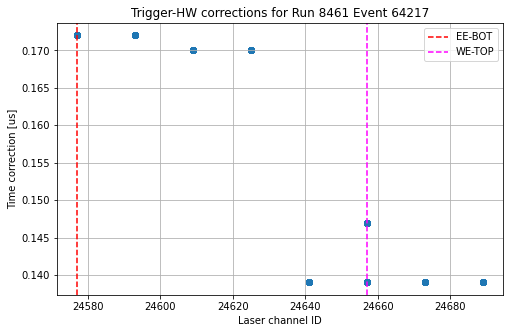

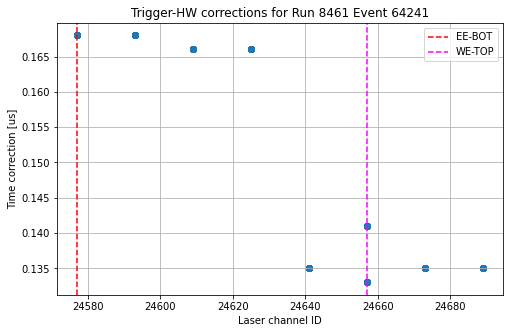

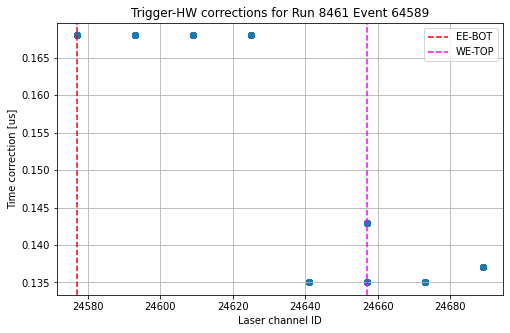

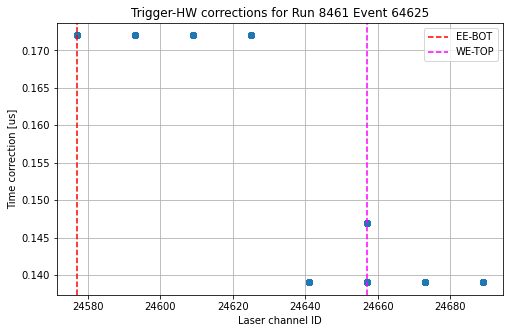

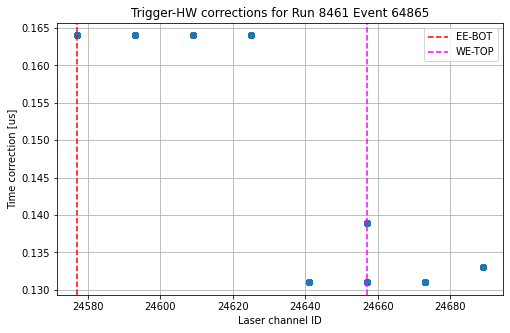

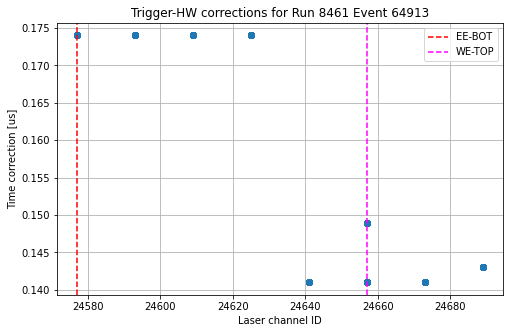

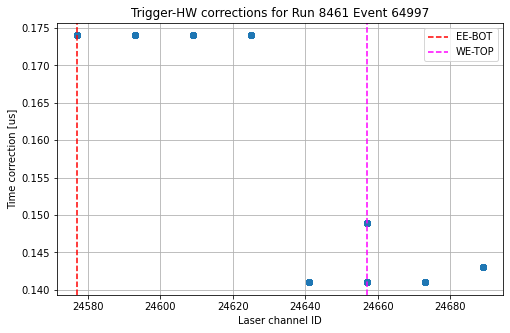

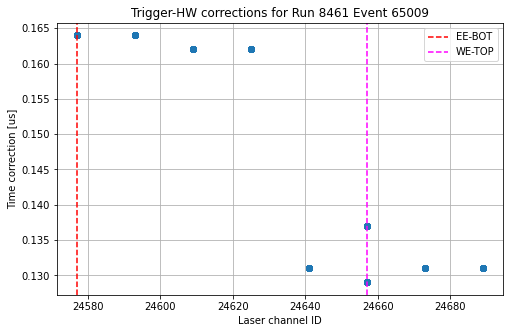

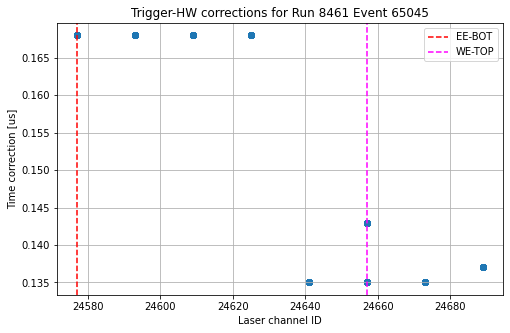

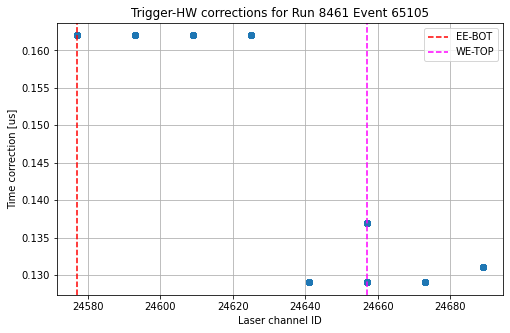

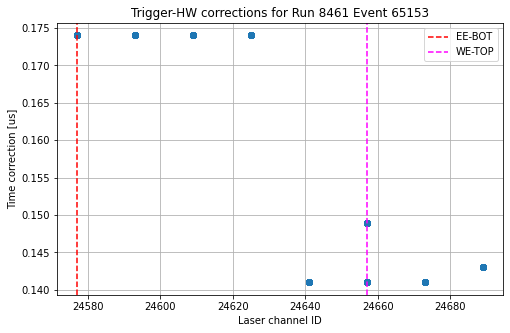

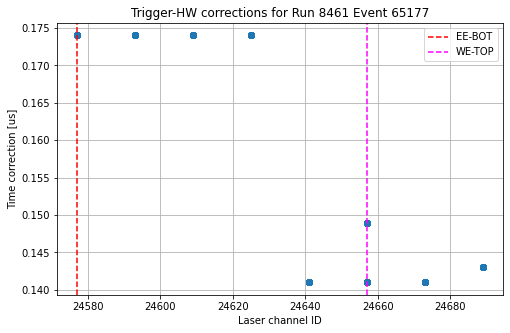

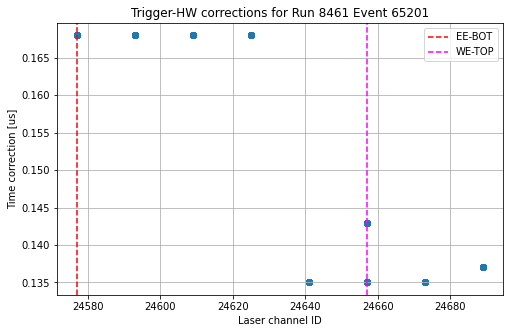

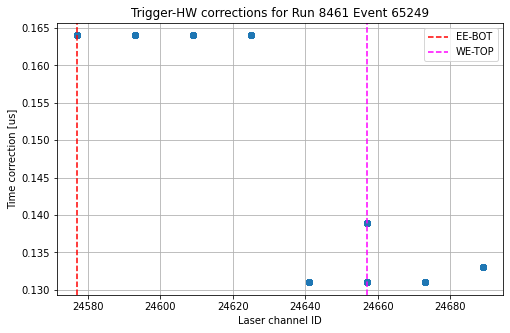

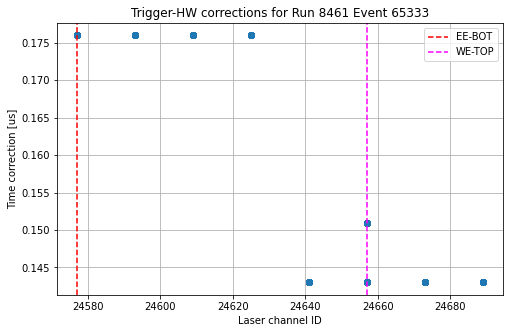

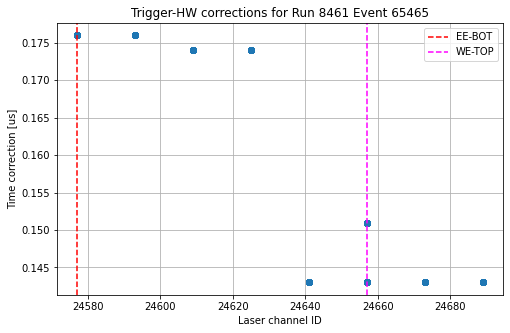

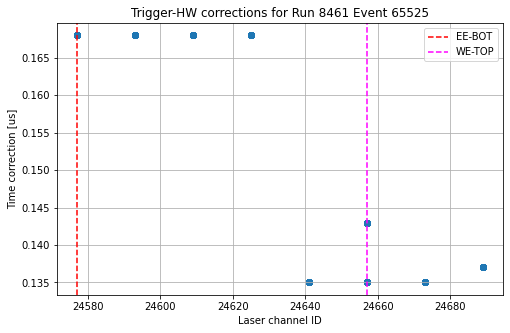

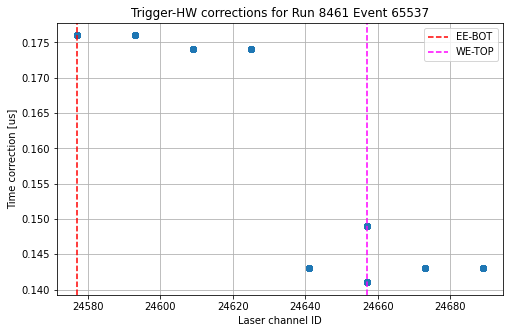

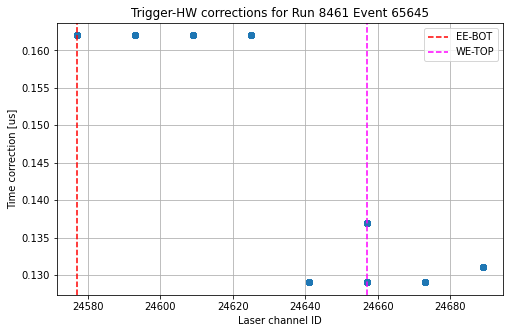

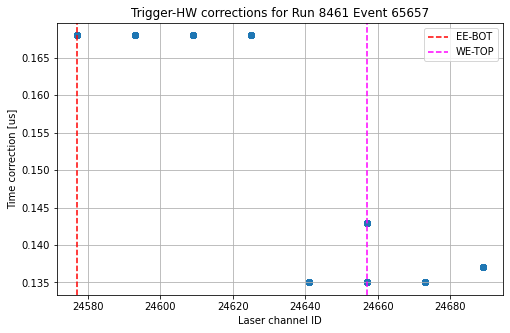

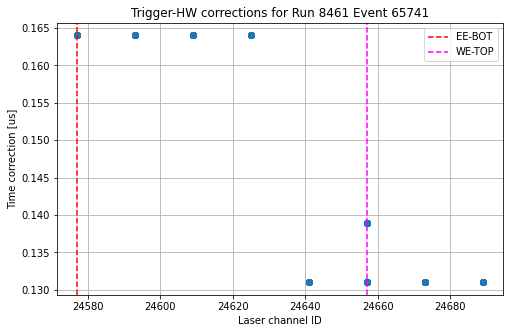

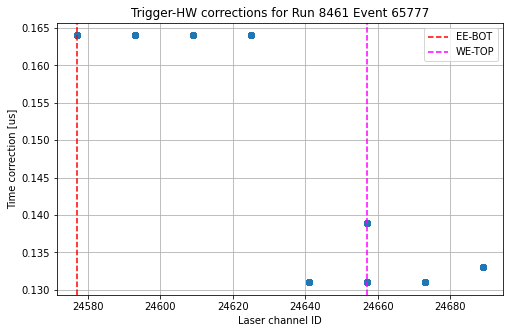

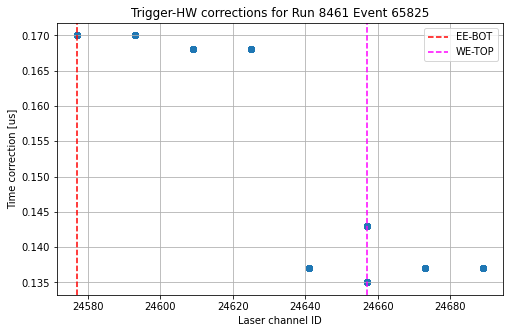

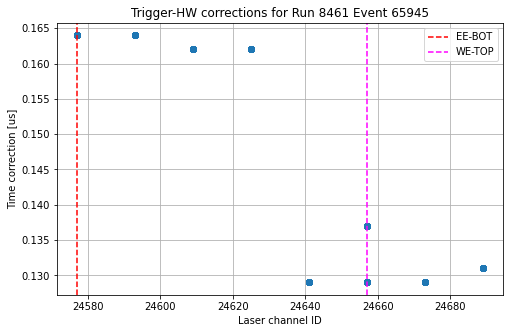

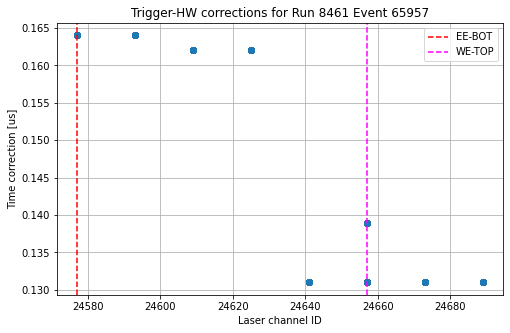

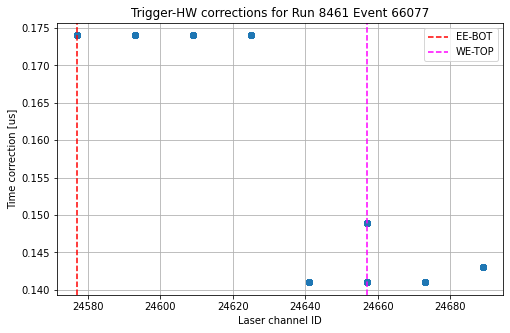

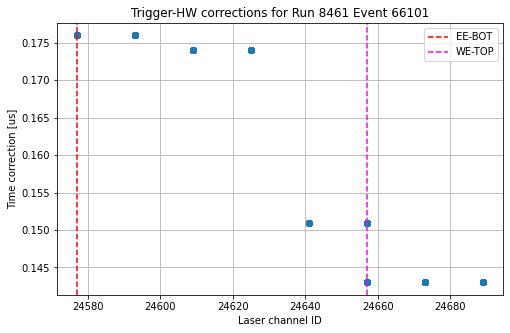

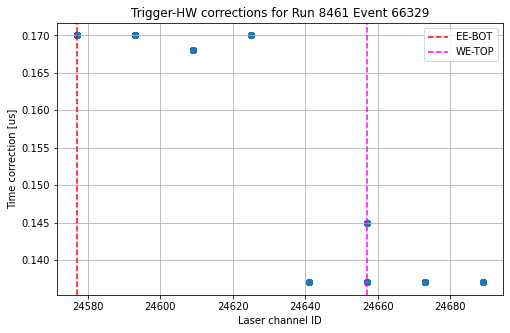

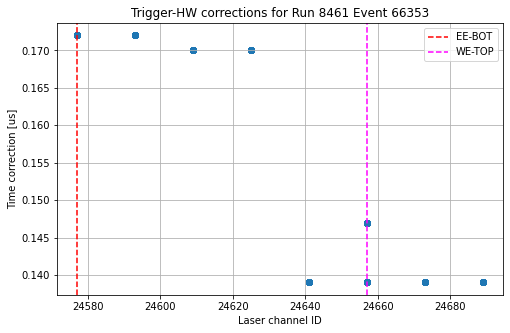

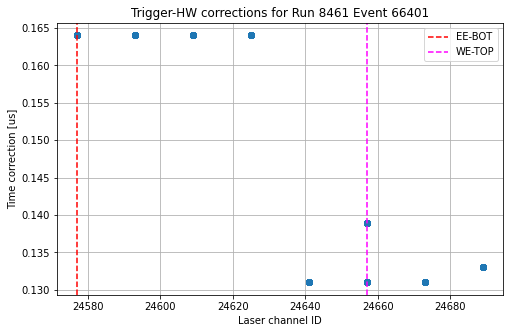

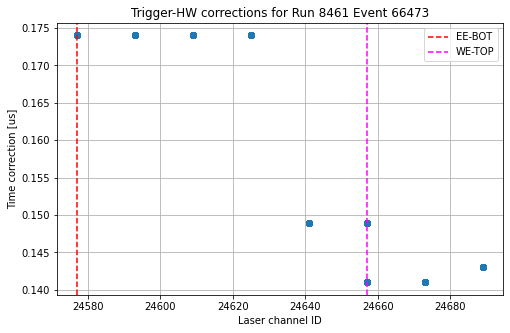

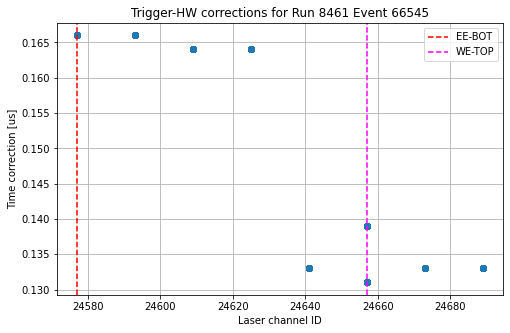

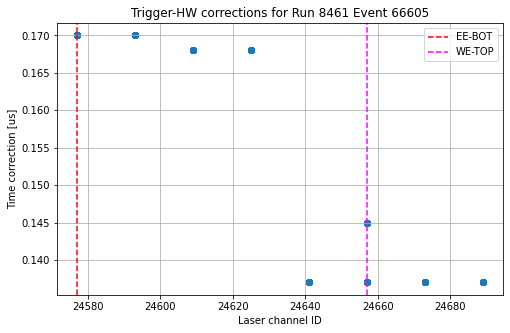

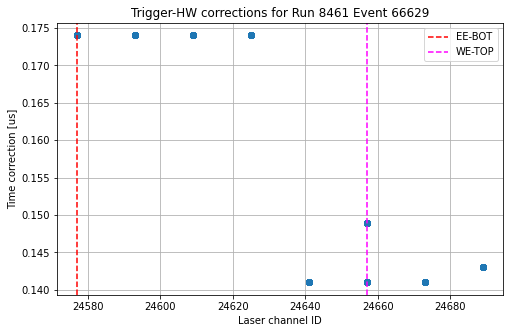

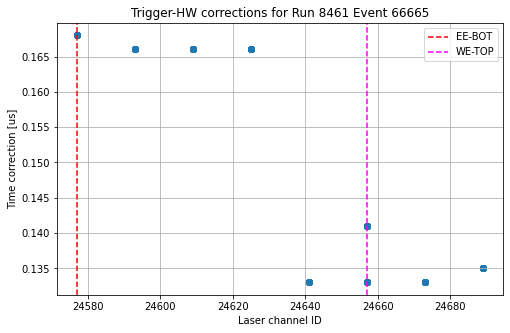

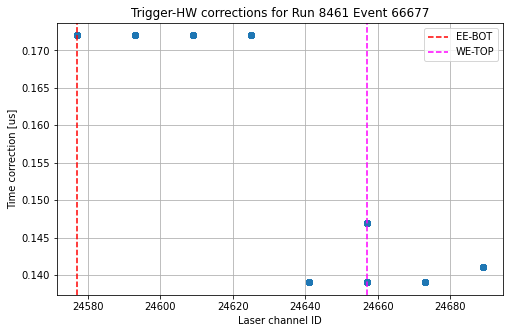

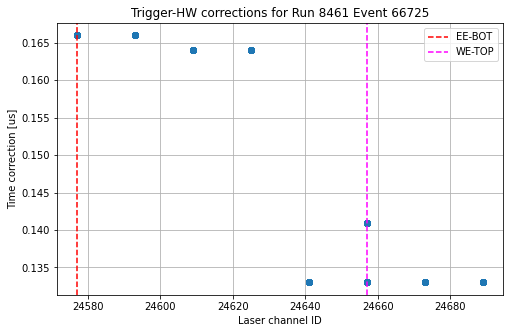

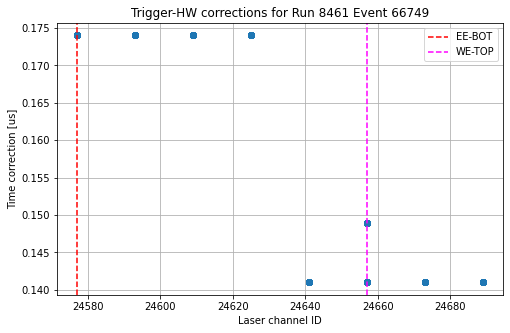

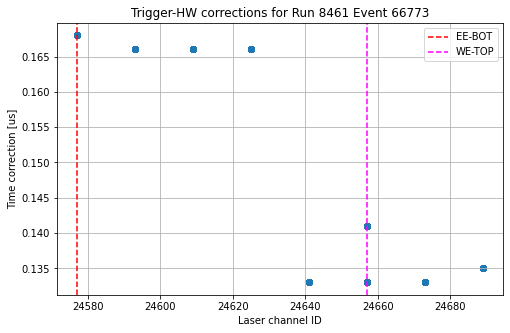

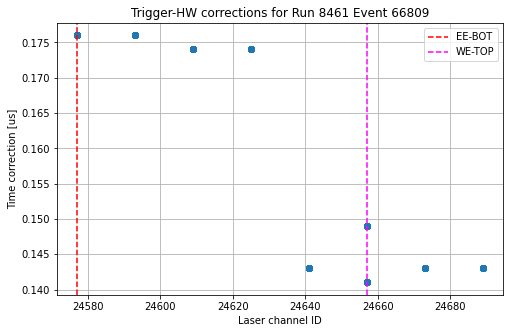

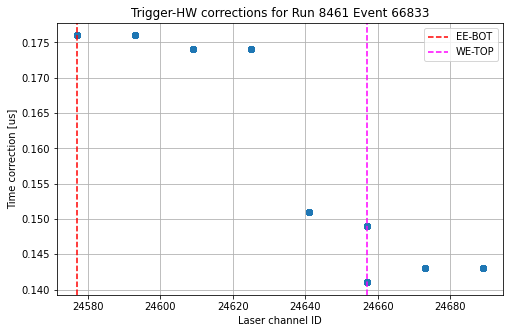

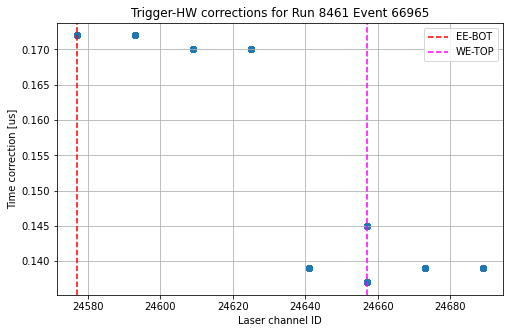

In [57]:
for ev in events:
    plot_trig_corr(df_wf_corrs,ev)

## CHECK AFTER REMOVING THE ADDITIONAL 8ns

In [15]:
fold = "/icarus/app/users/mvicenzi/OpHit/Trees-run8461_OLD_TABLE.root"
fnew = "/icarus/app/users/mvicenzi/OpHit/Trees-run8461_NEW_TABLE.root"

told = uproot.open(fold)
tnew = uproot.open(fnew)
do = told["checker/trigtree"].arrays(outputtype=pd.DataFrame, flatten=False)
dn = tnew["checker/trigtree"].arrays(outputtype=pd.DataFrame, flatten=False)

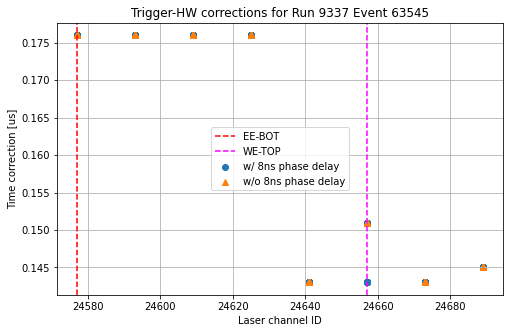

In [16]:
EVENT = 63545
fig = plt.figure(figsize=(8,5))
plt.scatter(do[do.event==EVENT].trg_channel,do[do.event==EVENT].wf_corr,label="w/ 8ns phase delay")
plt.scatter(dn[dn.event==EVENT].trg_channel,dn[dn.event==EVENT].wf_corr,label="w/o 8ns phase delay", marker="^")

plt.title("Trigger-HW corrections for Run {} Event {}".format(9337,EVENT))
plt.xlabel("Laser channel ID")
plt.ylabel("Time correction [us]")
plt.axvline(x=trig_channels["EE-BOT-A"], color="red", linestyle="dashed", label="EE-BOT")
plt.axvline(x=trig_channels["WE-TOP-A"], color="magenta", linestyle="dashed", label="WE-TOP")
plt.legend()
plt.grid()
plt.show()

In [17]:
del do; del dn
do = told["checker/ophittree"].arrays(outputtype=pd.DataFrame, flatten=False)
dn = tnew["checker/ophittree"].arrays(outputtype=pd.DataFrame, flatten=False)

In [18]:
wetopA = getChannelsFromBoard("WE-TOP-A")
wetopB = getChannelsFromBoard("WE-TOP-B")
wetopC = getChannelsFromBoard("WE-TOP-C")

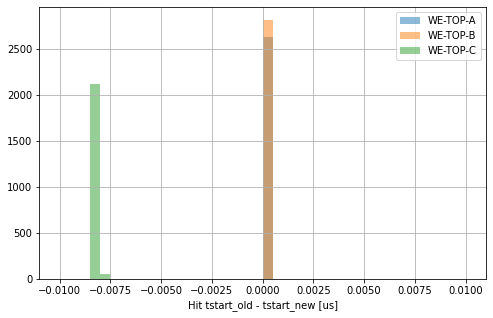

[238 239 235 236 237 230 233 234 232 231 220 223 224 222 221]


In [19]:
fig = plt.figure(figsize=(8,5))

plt.hist( do[(do.channel_id.isin(wetopA))&(do.event==EVENT)].tstart - dn[(dn.channel_id.isin(wetopA))&(dn.event==EVENT)].tstart,
          label="WE-TOP-A", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopB))&(do.event==EVENT)].tstart - dn[(dn.channel_id.isin(wetopB))&(dn.event==EVENT)].tstart,
          label="WE-TOP-B", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopC))&(do.event==EVENT)].tstart - dn[(dn.channel_id.isin(wetopC))&(dn.event==EVENT)].tstart,
          label="WE-TOP-C", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.xlabel("Hit tstart_old - tstart_new [us]")
plt.legend()
plt.grid()
plt.show()
print(wetopC)

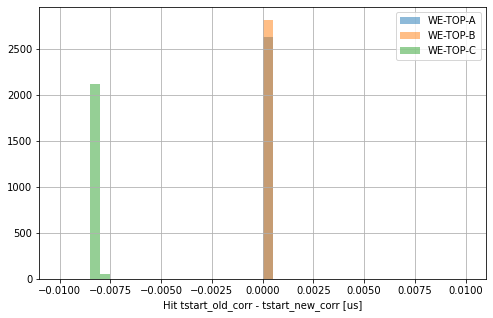

[238 239 235 236 237 230 233 234 232 231 220 223 224 222 221]


In [20]:
fig = plt.figure(figsize=(8,5))

plt.hist( do[(do.channel_id.isin(wetopA))&(do.event==EVENT)].tstart_corr - dn[(dn.channel_id.isin(wetopA))&(dn.event==EVENT)].tstart_corr,
          label="WE-TOP-A", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopB))&(do.event==EVENT)].tstart_corr - dn[(dn.channel_id.isin(wetopB))&(dn.event==EVENT)].tstart_corr,
          label="WE-TOP-B", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopC))&(do.event==EVENT)].tstart_corr - dn[(dn.channel_id.isin(wetopC))&(dn.event==EVENT)].tstart_corr,
          label="WE-TOP-C", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.xlabel("Hit tstart_old_corr - tstart_new_corr [us]")
plt.legend()
plt.grid()
plt.show()
print(wetopC)

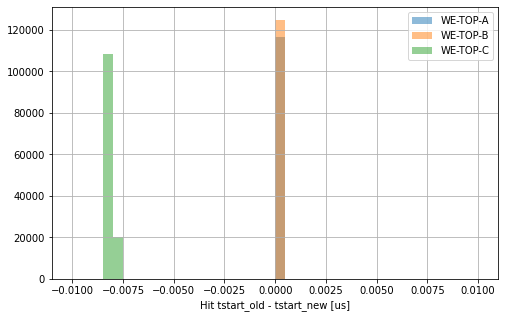

[238 239 235 236 237 230 233 234 232 231 220 223 224 222 221]


In [22]:
fig = plt.figure(figsize=(8,5))

plt.hist( do[(do.channel_id.isin(wetopA))].tstart - dn[(dn.channel_id.isin(wetopA))].tstart,
          label="WE-TOP-A", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopB))].tstart - dn[(dn.channel_id.isin(wetopB))].tstart,
          label="WE-TOP-B", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.hist( do[(do.channel_id.isin(wetopC))].tstart - dn[(dn.channel_id.isin(wetopC))].tstart,
          label="WE-TOP-C", range=(-0.01,0.01), bins=40, alpha=0.5 )
plt.xlabel("Hit tstart_old - tstart_new [us]")
plt.legend()
plt.grid()
plt.show()
print(wetopC)

Old - new = -8ns --> this means that all channels in WE-TOP-C are now +8ns than before! This seems to going in the wrong direction: all EAST will be at the "same" hw correction if -8ns were applied to all WE-TOP!!!  Anyway, what's likely more important is the consistency bewteen boards in the same crate.